In [375]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

In [376]:
data_df = pd.read_csv("insurance_part2_data.csv")

In [377]:
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [378]:
data_df.shape

(3000, 10)

In [379]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [380]:
data_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [381]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,3000.0,38.091000,10.463518,8.0,32.0,36.00,42.000,84.00
Commision,3000.0,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Duration,3000.0,70.001333,134.053313,-1.0,11.0,26.50,63.000,4580.00
Sales,3000.0,60.249913,70.733954,0.0,20.0,33.00,69.000,539.00


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age'}, xlabel='Age'>

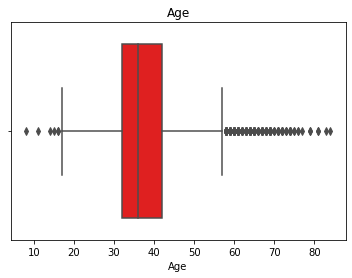

In [382]:
plt.title('Age')
sns.boxplot(data_df['Age'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


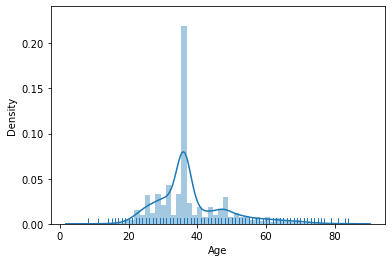

In [383]:
sns.distplot(data_df['Age'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Commision'}, xlabel='Commision'>

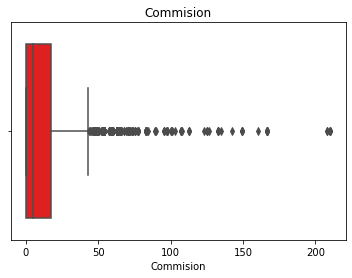

In [384]:
plt.title('Commision')
sns.boxplot(data_df['Commision'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


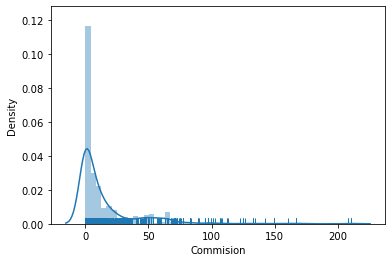

In [385]:
sns.distplot(data_df['Commision'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Duration'}, xlabel='Duration'>

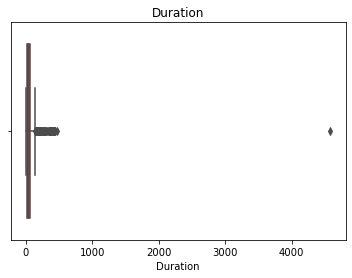

In [386]:
plt.title('Duration')
sns.boxplot(data_df['Duration'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


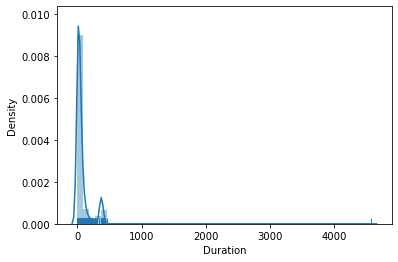

In [387]:
sns.distplot(data_df['Duration'], kde=True, rug=True);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Sales'}, xlabel='Sales'>

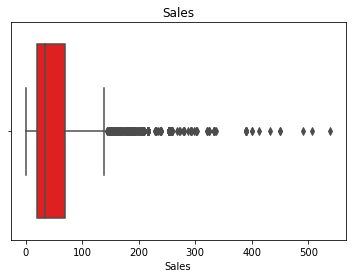

In [388]:
plt.title('Sales')
sns.boxplot(data_df['Sales'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


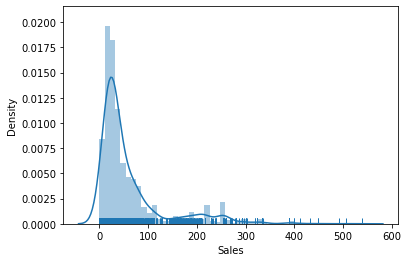

In [389]:
sns.distplot(data_df['Sales'], kde=True, rug=True);

In [390]:
data_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


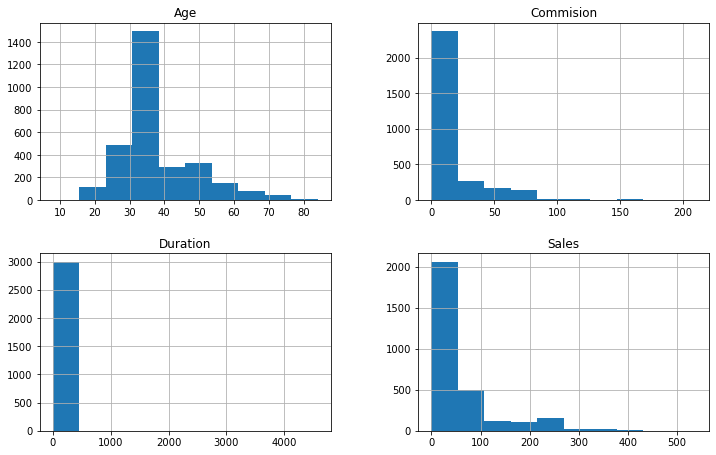

In [391]:
data_df.hist(figsize=(12,16),layout=(4,2));

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


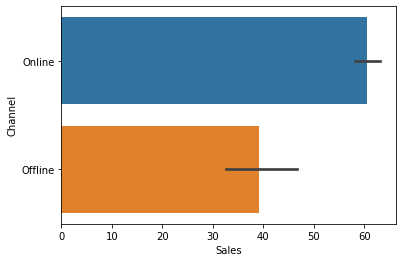

In [392]:
sns.barplot(data_df['Sales'], data_df['Channel']);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


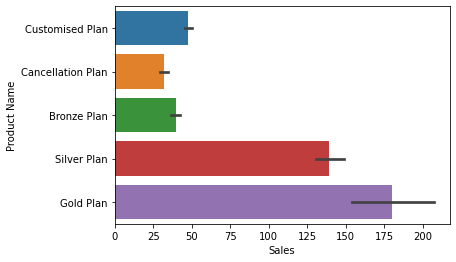

In [393]:
sns.barplot(data_df['Sales'], data_df['Product Name']);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


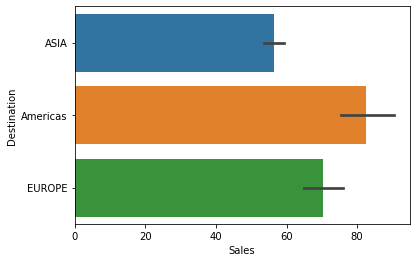

In [394]:
sns.barplot(data_df['Sales'], data_df['Destination']);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


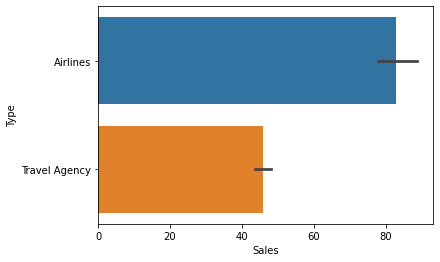

In [395]:
sns.barplot(data_df['Sales'], data_df['Type']);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


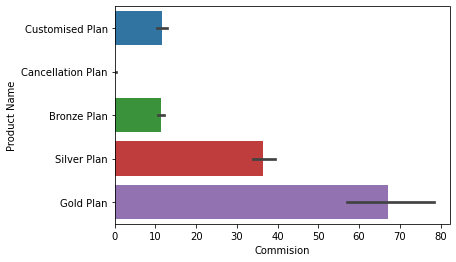

In [396]:
sns.barplot(data_df['Commision'], data_df['Product Name']);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


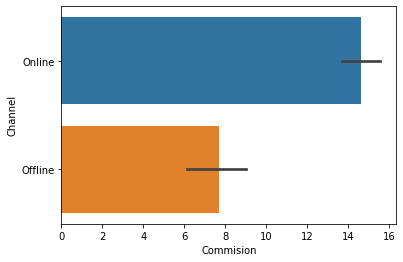

In [397]:
sns.barplot(data_df['Commision'], data_df['Channel']);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


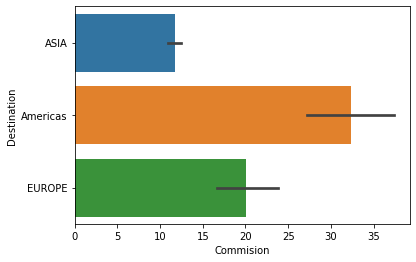

In [398]:
sns.barplot(data_df['Commision'], data_df['Destination']);

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


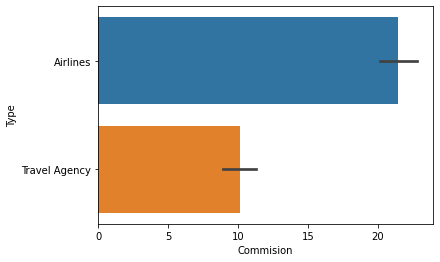

In [399]:
sns.barplot(data_df['Commision'], data_df['Type']);

In [400]:
data_df.head(1)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.7,Online,7,2.51,Customised Plan,ASIA


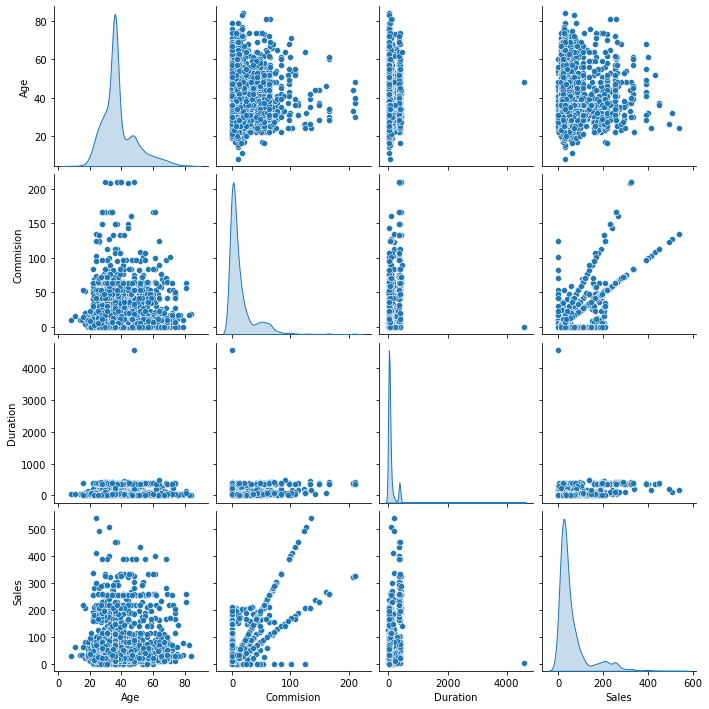

In [401]:
sns.pairplot(data_df,diag_kind='kde')

In [402]:
data_df.corr()

,Age,Commision,Duration,Sales
Age,1.000000,0.067717,0.030425,0.039455
Commision,0.067717,1.000000,0.471389,0.766505
Duration,0.030425,0.471389,1.000000,0.558930
Sales,0.039455,0.766505,0.558930,1.000000


<AxesSubplot:>

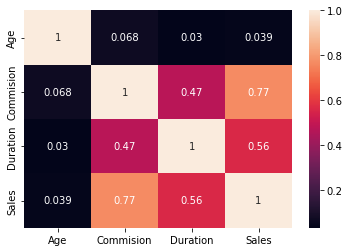

In [403]:
sns.heatmap(data_df.corr(),annot=True)

In [404]:
df=data_df.copy()

In [423]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [406]:
data_df.head(1)

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.7,Online,7,2.51,Customised Plan,ASIA


In [420]:
lrAge,urAge=remove_outlier(df['Age'])
df['Age']=np.where(df['Age']>urAge,urAge,df['Age'])
df['Age']=np.where(df['Age']<lrAge,lrAge,df['Age'])


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Age'}, xlabel='Age'>

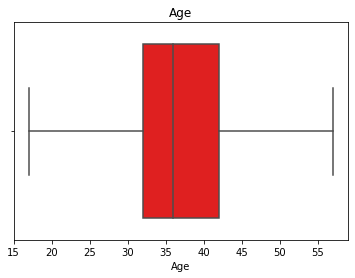

In [408]:
plt.title('Age')
sns.boxplot(df['Age'],orient='horizondal',color='red')

In [409]:
lrCommision,urCommision=remove_outlier(df['Commision'])
df['Commision']=np.where(df['Commision']>urAge,urAge,df['Commision'])
df['Commision']=np.where(df['Commision']<lrAge,lrAge,df['Commision'])


In [410]:
Q1 = np.percentile(df['Commision'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['Commision'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1


In [411]:
# Upper bound
upper = np.where(df['Commision'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['Commision'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)


New Shape:  (2258, 10)


In [424]:
lrDuration,urDuration=remove_outlier(df['Duration'])
df['Duration']=np.where(df['Duration']>urDuration,urDuration,df['Duration'])
df['Duration']=np.where(df['Duration']<lrAge,lrAge,df['Duration'])


In [413]:
lrSales,urSales=remove_outlier(df['Sales'])
df['Sales']=np.where(df['Sales']>urAge,urAge,df['Sales'])
df['Sales']=np.where(df['Sales']<lrAge,lrAge,df['Sales'])


/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Commision'}, xlabel='Commision'>

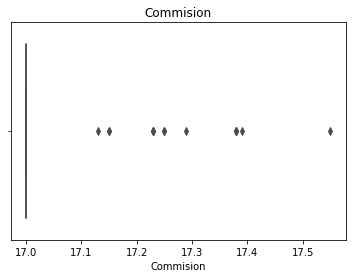

In [414]:
plt.title('Commision')
sns.boxplot(df['Commision'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Duration'}, xlabel='Duration'>

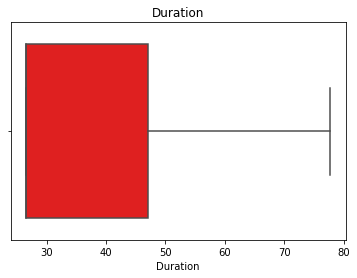

In [425]:
plt.title('Duration')
sns.boxplot(df['Duration'],orient='horizondal',color='red')

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Sales'}, xlabel='Sales'>

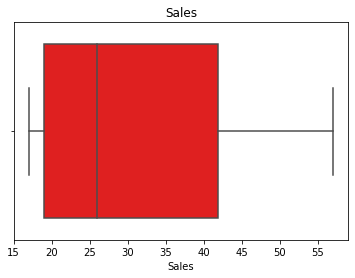

In [416]:
plt.title('Sales')
sns.boxplot(df['Sales'],orient='horizondal',color='red')

<AxesSubplot:>

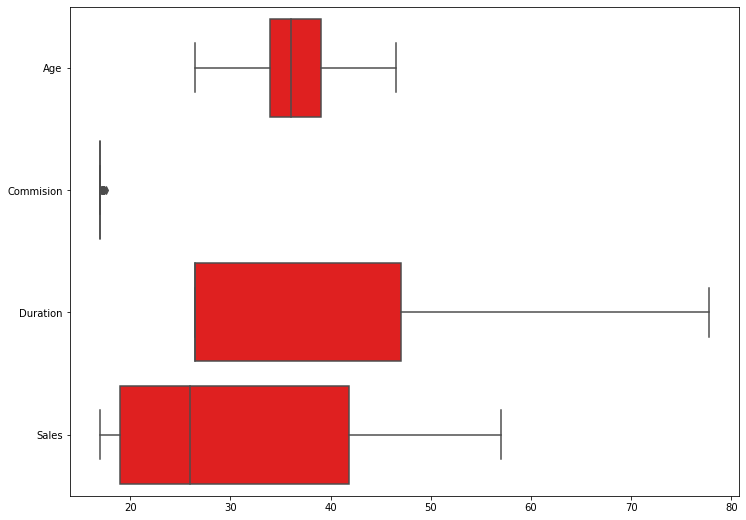

In [426]:
plt.figure(figsize=(12,9))
sns.boxplot(data=df,orient='horizondal',color='red')


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2258 non-null   float64
 1   Agency_Code   2258 non-null   object 
 2   Type          2258 non-null   object 
 3   Claimed       2258 non-null   object 
 4   Commision     2258 non-null   float64
 5   Channel       2258 non-null   object 
 6   Duration      2258 non-null   float64
 7   Sales         2258 non-null   float64
 8   Product Name  2258 non-null   object 
 9   Destination   2258 non-null   object 
dtypes: float64(4), object(6)
memory usage: 258.6+ KB


In [428]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [429]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2258 non-null   float64
 1   Agency_Code   2258 non-null   int8   
 2   Type          2258 non-null   int8   
 3   Claimed       2258 non-null   int8   
 4   Commision     2258 non-null   float64
 5   Channel       2258 non-null   int8   
 6   Duration      2258 non-null   float64
 7   Sales         2258 non-null   float64
 8   Product Name  2258 non-null   int8   
 9   Destination   2258 non-null   int8   
dtypes: float64(4), int8(6)
memory usage: 166.0 KB


In [430]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,46.5,0,0,0,17.0,1,26.5,17.0,2,0
1,36.0,2,1,0,17.0,1,34.0,20.0,2,0
2,39.0,1,1,0,17.0,1,26.5,17.0,2,1
3,36.0,2,1,0,17.0,1,26.5,26.0,1,0
4,33.0,3,0,0,17.0,1,53.0,18.0,0,0


In [431]:
df1=df.copy()

In [433]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,46.5,0,0,0,17.0,1,26.5,17.0,2,0
1,36.0,2,1,0,17.0,1,34.0,20.0,2,0
2,39.0,1,1,0,17.0,1,26.5,17.0,2,1
3,36.0,2,1,0,17.0,1,26.5,26.0,1,0
4,33.0,3,0,0,17.0,1,53.0,18.0,0,0


In [432]:
from scipy.stats import zscore
df_scaled=df1.apply(zscore)
df_scaled.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,1.629732,-1.581383,-1.360518,-0.562006,-0.07335,0.142599,-0.653955,-0.981409,0.599898,-0.344926
1,-0.085932,0.470780,0.735014,-0.562006,-0.07335,0.142599,-0.252922,-0.775446,0.599898,-0.344926
2,0.404258,-0.555302,0.735014,-0.562006,-0.07335,0.142599,-0.653955,-0.981409,0.599898,1.688608
3,-0.085932,0.470780,0.735014,-0.562006,-0.07335,0.142599,-0.653955,-0.363522,-0.319701,-0.344926
4,-0.576121,1.496861,-1.360518,-0.562006,-0.07335,0.142599,0.763029,-0.912755,-1.239301,-0.344926


In [434]:
X = df.drop("Claimed" , axis=1)

Y = df.pop("Claimed")

X.head()


,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,46.5,0,0,17.0,1,26.5,17.0,2,0
1,36.0,2,1,17.0,1,34.0,20.0,2,0
2,39.0,1,1,17.0,1,26.5,17.0,2,1
3,36.0,2,1,17.0,1,26.5,26.0,1,0
4,33.0,3,0,17.0,1,53.0,18.0,0,0


In [435]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Claimed, dtype: int8

In [436]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, Y, test_size=.30, random_state=5)

In [437]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [453]:
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [454]:
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier()

In [455]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,8,10,11],
    'min_samples_leaf': [40, 50, 60],
    'min_samples_split': [150, 300, 450]
}

dt_model = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dt_model, param_grid = param_grid, cv = 3)

In [456]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 8, 10, 11],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [150, 300, 450]})

In [457]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 150}

In [458]:
best_grid = grid_search.best_estimator_

In [459]:
Ytrain_predict = best_grid.predict(X_train)
Ytest_predict = best_grid.predict(X_test)

In [466]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 5,min_samples_leaf=50,min_samples_split=150)
reg_dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=150)

In [468]:
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=150)


In [ ]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

In [469]:
from sklearn.metrics import classification_report,confusion_matrix

In [470]:
print(classification_report(train_labels,Ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.95      0.88      1200
           1       0.67      0.34      0.46       380

    accuracy                           0.80      1580
   macro avg       0.75      0.65      0.67      1580
weighted avg       0.78      0.80      0.78      1580



In [471]:
print(classification_report(test_labels,Ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       516
           1       0.64      0.33      0.44       162

    accuracy                           0.79       678
   macro avg       0.73      0.64      0.66       678
weighted avg       0.77      0.79      0.77       678



In [472]:
confusion_matrix(train_labels, Ytrain_predict)

array([[1136,   64],
       [ 249,  131]])

In [495]:
1136+131

1267

In [496]:
1267+249+64

1580

In [497]:
1267/1580

0.8018987341772152

In [473]:
confusion_matrix(test_labels, Ytest_predict)

array([[485,  31],
       [108,  54]])

In [498]:
485+54

539

In [499]:
539+108+31

678

In [500]:
539/678

0.7949852507374632

AUC: 0.805


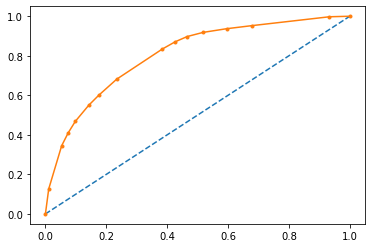

In [474]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.780


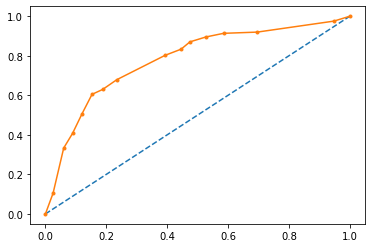

In [475]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [476]:
rfcl = RandomForestClassifier()
rfcl = rfcl.fit(X_train, train_labels)

In [477]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [10,15],
    'max_features': [ 6,10],
    'min_samples_leaf': [5,6,8],
    'min_samples_split': [ 50],
    'n_estimators': [360,400]
}

rfcl = RandomForestClassifier()

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 3)


In [478]:
grid_search.fit(X_train, train_labels)

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/vallirajasekar/opt/anaconda3/l

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/vallirajasekar/opt/anaconda3/l

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/vallirajasekar/opt/anaconda3/l

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/vallirajasekar/opt/anaconda3/l

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/vallirajasekar/opt/anaconda3/l

/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/vallirajasekar/opt/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/vallirajasekar/opt/anaconda3/l

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15], 'max_features': [6, 10],
                         'min_samples_leaf': [5, 6, 8],
                         'min_samples_split': [50],
                         'n_estimators': [360, 400]})

In [479]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 6,
 'min_samples_split': 50,
 'n_estimators': 360}

In [480]:
best_grid = grid_search.best_estimator_

In [481]:
Ytrain_predict = best_grid.predict(X_train)
Ytest_predict = best_grid.predict(X_test)

In [482]:
confusion_matrix(train_labels,Ytrain_predict)

array([[1132,   68],
       [ 222,  158]])

In [489]:
1132+158

1290

In [490]:
1132+158+222+68

1580

In [491]:
1290/1580

0.8164556962025317

In [483]:
confusion_matrix(test_labels,Ytest_predict)

array([[473,  43],
       [ 96,  66]])

In [492]:
473+66

539

In [493]:
539+96+43

678

In [494]:
539/678

0.7949852507374632

In [484]:
print(classification_report(train_labels,Ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1200
           1       0.70      0.42      0.52       380

    accuracy                           0.82      1580
   macro avg       0.77      0.68      0.70      1580
weighted avg       0.80      0.82      0.80      1580



In [485]:
print(classification_report(test_labels,Ytest_predict))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       516
           1       0.61      0.41      0.49       162

    accuracy                           0.79       678
   macro avg       0.72      0.66      0.68       678
weighted avg       0.78      0.79      0.78       678



AUC: 0.857


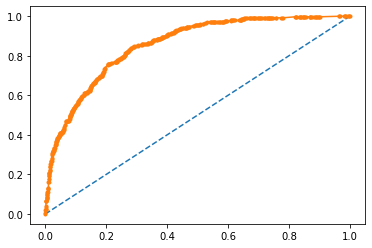

In [487]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.792


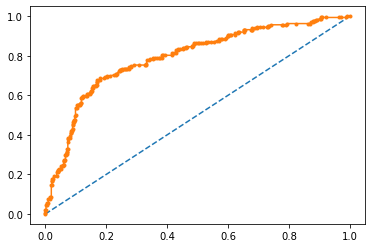

In [488]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)

# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()